## Algorithm

A simple gradient Descent Algorithm is as follows:
1. Obtain a function to minimize F(x)

2. Initialize a value x from which to start the descent or optimization from

3. Specify a learning rate that will determine how much of a step to descend by or how quickly you converge to the minimum value

4. Obtain the derivative of that value x (the descent)

5. Proceed to descend by the derivative of that value multiplied by the learning rate

6. Update the value of x with the new value descended to

7. Check your stop condition to see whether to stop

8. If condition satisfied, stop. If not, proceed to step 4 with the new x value and keep repeating algorithm

### Let us implement this in Python

We will implement a simple representation of gradient descent using python. 

We will create an arbitrary loss function and attempt to find a local minimum value for that function— f(x) = x³ — 3x² + 7

#### Step 1

We will first visualize this function with a set of values ranging from -1 and 3 (arbitrarily chosen to ensure steep curve)

In [15]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

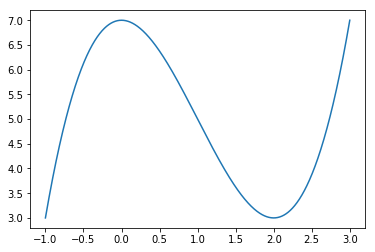

In [43]:
#creating the function and plotting it 
function = lambda x:(x**3) -(3*(x**2)) + 7

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-1,3,1000)

#Plot the curve
plt.plot(x, function(x))
plt.show()

#### Step 2

We will then proceed to make two functions for the gradient descent implementation:

The first is a derivative function: 


This function takes in a value of x and returns its derivative based on the initial function we specified. It is shown below:

In [44]:
def deriv(x):
    
    '''
    Description: This function takes in a value of x and returns its derivative based on the 
    initial function we specified.
    
    Arguments:
    
    x - a numerical value of x 
    
    Returns:
    
    x_deriv - a numerical value of the derivative of x
    
    '''
    
    x_deriv = (3*(x**2)) -6*x
    
    return x_deriv

deriv(x)

array([ 9.00000000e+00,  8.95200005e+00,  8.90409629e+00,  8.85628872e+00,
        8.80857735e+00,  8.76096216e+00,  8.71344317e+00,  8.66602037e+00,
        8.61869377e+00,  8.57146336e+00,  8.52432913e+00,  8.47729110e+00,
        8.43034927e+00,  8.38350362e+00,  8.33675417e+00,  8.29010091e+00,
        8.24354384e+00,  8.19708297e+00,  8.15071829e+00,  8.10444980e+00,
        8.05827750e+00,  8.01220139e+00,  7.96622148e+00,  7.92033776e+00,
        7.87455023e+00,  7.82885889e+00,  7.78326374e+00,  7.73776479e+00,
        7.69236203e+00,  7.64705546e+00,  7.60184509e+00,  7.55673091e+00,
        7.51171291e+00,  7.46679112e+00,  7.42196551e+00,  7.37723609e+00,
        7.33260287e+00,  7.28806584e+00,  7.24362501e+00,  7.19928036e+00,
        7.15503191e+00,  7.11087965e+00,  7.06682358e+00,  7.02286370e+00,
        6.97900002e+00,  6.93523253e+00,  6.89156123e+00,  6.84798612e+00,
        6.80450721e+00,  6.76112449e+00,  6.71783796e+00,  6.67464762e+00,
        6.63155348e+00,  

#### Step 3

The second is a Step function: 


This is the function where the actual gradient descent takes place. 



This function takes in an initial or previous value for x, updates it based on steps taken via the learning rate and outputs the most minimum value of x that reaches the stop condition. 



For our stop condition, we are going to use a precision stop.



This means that when the absolute difference between our old and updated x is greater than a value, the algorithm should stop. 



The function will also print out the minimum value of x as well as the number of steps or descents it took to reach that value.

In [64]:
# Your code here

def step(x_new, x_prev, precision, l_r):
    
    '''
    Description: This function takes in an initial or previous value for x, updates it based on 
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.
    
    Arguments:
    
    x_new - a starting value of x that will get updated based on the learning rate
    
    x_prev - the previous value of x that is getting updated to the new one
    
    precision - a precision that determines the stop of the stepwise descent 
    
    l_r - the learning rate (size of each descent step)
    
    Output:
    
    1. Prints out the latest new value of x which equates to the minimum we are looking for
    2. Prints out the the number of x values which equates to the number of gradient descent steps
    3. Plots a first graph of the function with the gradient descent path
    4. Plots a second graph of the function with a zoomed in gradient descent path in the important area
    
    '''
    
    # create empty lists where the updated values of x and y wil be appended during each iteration
    x_list = [x_new]
    y_list = [function(x_new)]
    
    # keep looping until your desired precision
    while abs(x_new - x_prev) > precision:
    
        
        # change the value of x
        x_prev = x_new
        
        # get the derivation of the old value of x
        d_x = - deriv(x_prev)  
        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev + (d_x * l_r)    
        
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)    
        
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(function(x_new))   

    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    
    # Create plot to show Gradient descent, 

    plt.subplot(2,1,2)
    plt.scatter(x_list, y_list,c='g')
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Gradient descent")
    plt.show()
    
    plt.subplot(2,1,2)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.xlim([1.0,2.1])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

#### Step 4

Local minimum occurs at: 1.9980265135950486
Number of steps: 25


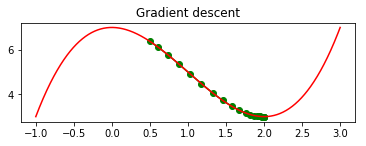

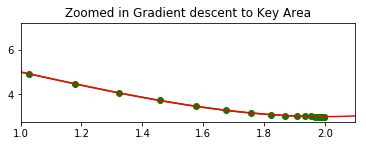

In [65]:
#Implement gradient descent (all the arguments are arbitrarily chosen)

step(0.5, 0, 0.001, 0.05)